In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

2025-04-18 21:58:31.293506: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


X_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)


In [3]:
def build_baseline_ann():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),         # Flatten the 3D image into 1D
        Dense(512, activation='relu'),           # Large first layer to capture many patterns
        Dense(256, activation='relu'),           # Reduce to mid-size representation
        Dense(10, activation='softmax')          # Output layer for 10 classes
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = build_baseline_ann()
model.summary()

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    shuffle=True,
    epochs=20,
    batch_size=64,
    verbose=2
)
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc, "Test loss:", test_loss)



Epoch 1/20


KeyboardInterrupt: 

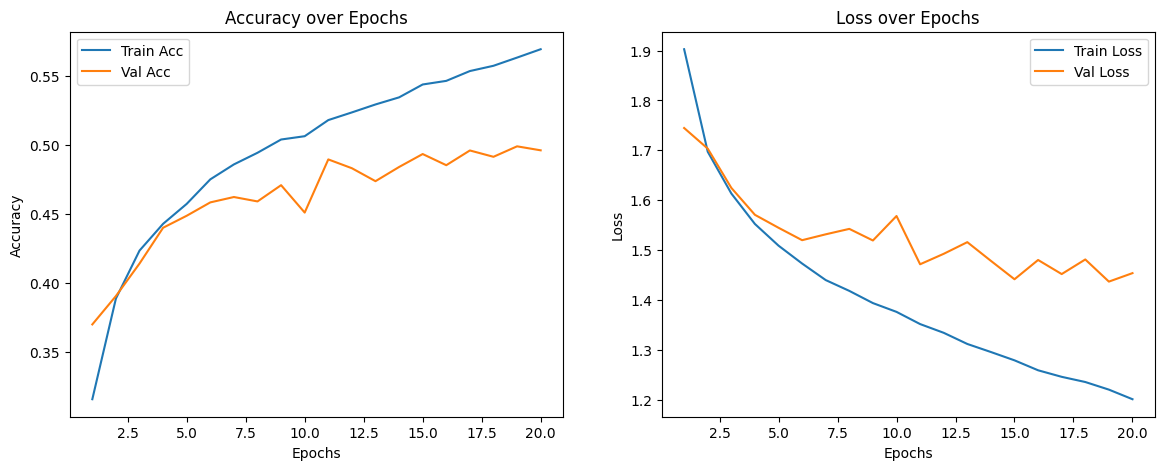

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Acc')
    plt.plot(epochs, val_acc, label='Val Acc')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Test Accuracy: 0.5050, Test Loss: 1.4252


In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted classes shape:", predicted_classes.shape)
print("True classes shape:", y_test.shape)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_classes))
print("Classification Report:\n", classification_report(y_test, predicted_classes))
print("Accuracy:", accuracy_score(y_test, predicted_classes))
print("Precision:", precision_score(y_test, predicted_classes, average='weighted'))
print("Recall:", recall_score(y_test, predicted_classes, average='weighted'))
print("F1 Score:", f1_score(y_test, predicted_classes, average='weighted'))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes shape: (10000,)
True classes shape: (10000, 1)
Confusion Matrix:
 [[612  28  88  12  31  15  28  24 117  45]
 [ 63 615  13  29  11  17  18  37  74 123]
 [ 75  26 392  99 125  63 122  66  17  15]
 [ 39  13  89 355  54 167 165  51  24  43]
 [ 60   9 136  74 411  36 153  79  23  19]
 [ 33  10  91 243  47 349 109  78  20  20]
 [ 11   7  67  81 110  46 619  31  12  16]
 [ 67  23  57  78  77  61  37 547  11  42]
 [144  53  14  28  20  30  14  16 626  55]
 [ 77 188  12  30  14  28  22  46  59 524]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.61      0.56      1000
           1       0.63      0.61      0.62      1000
           2       0.41      0.39      0.40      1000
           3       0.34      0.35      0.35      1000
           4       0.46      0.41      0.43      1000
           5       0.43      0.35      0.39      1000
           6       0.48      0.62      0.

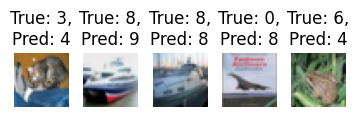

In [ ]:
plt.figure(figsize=(5,3))
for i in range(5):
    plt.subplot(1, 7, i+1)
    plt.imshow(X_test[i])
    plt.title(f"True: {y_test[i][0]},\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def build_model1(learning_rate=0.001, dropout1=0.3, dropout2=0.2):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(dropout1),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout2),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

param_grid = {
    "model__learning_rate": [0.001, 0.0005],
    "model__dropout1": [0.3],
    "model__dropout2": [0.2],
    "batch_size": [64, 32],
    "epochs": [50],
}

model = KerasClassifier(model=build_model1, verbose=1, validation_split=0.2)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, n_jobs=1)

grid.fit(X_train, y_train, callbacks=[early_stop])

print("Best parameters found: ", grid.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.2888 - loss: 2.1612 - val_accuracy: 0.3517 - val_loss: 1.8606
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3730 - loss: 1.7893 - val_accuracy: 0.3174 - val_loss: 1.9898
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4037 - loss: 1.6817 - val_accuracy: 0.3885 - val_loss: 1.7165
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4143 - loss: 1.6514 - val_accuracy: 0.4003 - val_loss: 1.6713
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4296 - loss: 1.6101 - val_accuracy: 0.4098 - val_loss: 1.6528
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4320 - loss: 1.5994 - val_accuracy: 0.4252 - val_loss: 1.6171
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4308 - loss: 1.5815 - val_accuracy: 0.4266 - val_loss: 1.6133
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4298 - loss: 1.5985 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.2904 - loss: 2.1491 - val_accuracy: 0.3252 - val_loss: 1.8710
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.3729 - loss: 1.7811 - val_accuracy: 0.3535 - val_loss: 1.8304
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4037 - loss: 1.6884 - val_accuracy: 0.3807 - val_loss: 1.7239
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4269 - loss: 1.6369 - val_accuracy: 0.3397 - val_loss: 1.7802
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.4203 - loss: 1.6300 - val_accuracy: 0.4237 - val_loss: 1.6209
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.4264 - loss: 1.6106 - val_accuracy: 0.4197 - val_loss: 1.6313
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.4336 - loss: 1.6003 - val_accuracy: 0.3208 - val_loss: 1.9163
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.4231 - loss: 1.6198 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.2863 - loss: 2.1631 - val_accuracy: 0.3253 - val_loss: 1.9841
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.3833 - loss: 1.7643 - val_accuracy: 0.3429 - val_loss: 1.8162
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.4068 - loss: 1.6836 - val_accuracy: 0.3718 - val_loss: 1.7295
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.4153 - loss: 1.6490 - val_accuracy: 0.3828 - val_loss: 1.7311
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.4184 - loss: 1.6338 - val_accuracy: 0.3238 - val_loss: 2.0744
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.4262 - loss: 1.6068 - val_accuracy: 0.3646 - val_loss: 1.7603
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.4322 - loss: 1.5993 - val_accuracy: 0.4071 - val_loss: 1.6687
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.4374 - loss: 1.5719 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.2784 - loss: 2.1950 - val_accuracy: 0.3376 - val_loss: 1.8514
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.3653 - loss: 1.8091 - val_accuracy: 0.3012 - val_loss: 2.0099
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.3895 - loss: 1.7222 - val_accuracy: 0.3520 - val_loss: 1.8512
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.4064 - loss: 1.6857 - val_accuracy: 0.4009 - val_loss: 1.6905
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.4185 - loss: 1.6401 - val_accuracy: 0.4116 - val_loss: 1.6948
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.4278 - loss: 1.6222 - val_accuracy: 0.4237 - val_loss: 1.6142
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.4345 - loss: 1.5905 - val_accuracy: 0.4008 - val_loss: 1.7043
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.4309 - loss: 1.5849 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.2815 - loss: 2.2037 - val_accuracy: 0.3504 - val_loss: 1.8539
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3719 - loss: 1.8083 - val_accuracy: 0.3394 - val_loss: 1.9353
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.3892 - loss: 1.7304 - val_accuracy: 0.3828 - val_loss: 1.7132
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4083 - loss: 1.6693 - val_accuracy: 0.3751 - val_loss: 1.7237
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4204 - loss: 1.6461 - val_accuracy: 0.3876 - val_loss: 1.7389
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.4242 - loss: 1.6298 - val_accuracy: 0.3451 - val_loss: 1.8323
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4237 - loss: 1.6102 - val_accuracy: 0.3903 - val_loss: 1.6773
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4385 - loss: 1.5872 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.2893 - loss: 2.1982 - val_accuracy: 0.3370 - val_loss: 1.9034
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.3722 - loss: 1.8052 - val_accuracy: 0.3597 - val_loss: 1.8247
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.3987 - loss: 1.7176 - val_accuracy: 0.2872 - val_loss: 2.0895
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.4120 - loss: 1.6645 - val_accuracy: 0.3903 - val_loss: 1.7348
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4169 - loss: 1.6465 - val_accuracy: 0.3898 - val_loss: 1.7137
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4280 - loss: 1.6129 - val_accuracy: 0.4338 - val_loss: 1.6032
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4436 - loss: 1.5751 - val_accuracy: 0.4338 - val_loss: 1.6033
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4524 - loss: 1.5567 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.2803 - loss: 2.1551 - val_accuracy: 0.3394 - val_loss: 1.8211
Epoch 2/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.3692 - loss: 1.7892 - val_accuracy: 0.3691 - val_loss: 1.7728
Epoch 3/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.3825 - loss: 1.7307 - val_accuracy: 0.3847 - val_loss: 1.7235
Epoch 4/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.3967 - loss: 1.6970 - val_accuracy: 0.4024 - val_loss: 1.6999
Epoch 5/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.3996 - loss: 1.6884 - val_accuracy: 0.4203 - val_loss: 1.6390
Epoch 6/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4076 - loss: 1.6660 - val_accuracy: 0.3975 - val_loss: 1.7036
Epoch 7/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4108 - loss: 1.6579 - val_accuracy: 0.4276 - val_loss: 1.6614
Epoch 8/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.4118 - loss: 1.6470 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 208s 248ms/step - accuracy: 0.2758 - loss: 2.1734 - val_accuracy: 0.3517 - val_loss: 1.8709
Epoch 2/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.3574 - loss: 1.8076 - val_accuracy: 0.3238 - val_loss: 1.9007
Epoch 3/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.3770 - loss: 1.7370 - val_accuracy: 0.3973 - val_loss: 1.7097
Epoch 4/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.3918 - loss: 1.7038 - val_accuracy: 0.3939 - val_loss: 1.7299
Epoch 5/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.3935 - loss: 1.6865 - val_accuracy: 0.4272 - val_loss: 1.6203
Epoch 6/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4133 - loss: 1.6463 - val_accuracy: 0.4141 - val_loss: 1.6414
Epoch 7/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4114 - loss: 1.6477 - val_accuracy: 0.4413 - val_loss: 1.6146
Epoch 8/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4200 - loss: 1.6354 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.2804 - loss: 2.1566 - val_accuracy: 0.3144 - val_loss: 1.8987
Epoch 2/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.3620 - loss: 1.8083 - val_accuracy: 0.3666 - val_loss: 1.7810
Epoch 3/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3884 - loss: 1.7140 - val_accuracy: 0.3750 - val_loss: 1.7359
Epoch 4/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.4090 - loss: 1.6689 - val_accuracy: 0.4150 - val_loss: 1.6457
Epoch 5/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.4108 - loss: 1.6591 - val_accuracy: 0.3888 - val_loss: 1.7046
Epoch 6/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.4161 - loss: 1.6464 - val_accuracy: 0.3738 - val_loss: 1.8445
Epoch 7/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.3996 - loss: 1.6660 - val_accuracy: 0.4240 - val_loss: 1.6055
Epoch 8/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.4072 - loss: 1.6492 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.2744 - loss: 2.2075 - val_accuracy: 0.3361 - val_loss: 1.8800
Epoch 2/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - accuracy: 0.3556 - loss: 1.8283 - val_accuracy: 0.3727 - val_loss: 1.7470
Epoch 3/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - accuracy: 0.3833 - loss: 1.7362 - val_accuracy: 0.3993 - val_loss: 1.7001
Epoch 4/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - accuracy: 0.3810 - loss: 1.7346 - val_accuracy: 0.3357 - val_loss: 1.9195
Epoch 5/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - accuracy: 0.4055 - loss: 1.6859 - val_accuracy: 0.4201 - val_loss: 1.6638
Epoch 6/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.4153 - loss: 1.6475 - val_accuracy: 0.4161 - val_loss: 1.6488
Epoch 7/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - accuracy: 0.4241 - loss: 1.6324 - val_accuracy: 0.4473 - val_loss: 1.5825
Epoch 8/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - accuracy: 0.4239 - loss: 1.6257 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.2805 - loss: 2.1963 - val_accuracy: 0.3574 - val_loss: 1.8355
Epoch 2/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.3614 - loss: 1.8244 - val_accuracy: 0.3781 - val_loss: 1.7551
Epoch 3/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.3757 - loss: 1.7689 - val_accuracy: 0.3813 - val_loss: 1.7334
Epoch 4/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.3908 - loss: 1.7125 - val_accuracy: 0.3682 - val_loss: 1.7916
Epoch 5/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.3960 - loss: 1.6967 - val_accuracy: 0.3921 - val_loss: 1.7349
Epoch 6/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.4062 - loss: 1.6888 - val_accuracy: 0.4018 - val_loss: 1.6826
Epoch 7/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.4005 - loss: 1.6756 - val_accuracy: 0.3973 - val_loss: 1.7110
Epoch 8/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.4017 - loss: 1.6794 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.2849 - loss: 2.1903 - val_accuracy: 0.3465 - val_loss: 1.8640
Epoch 2/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3632 - loss: 1.8116 - val_accuracy: 0.3846 - val_loss: 1.7331
Epoch 3/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3882 - loss: 1.7314 - val_accuracy: 0.3907 - val_loss: 1.7072
Epoch 4/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3845 - loss: 1.7178 - val_accuracy: 0.3781 - val_loss: 1.7187
Epoch 5/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.4014 - loss: 1.6957 - val_accuracy: 0.3834 - val_loss: 1.7649
Epoch 6/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.4064 - loss: 1.6530 - val_accuracy: 0.4081 - val_loss: 1.6706
Epoch 7/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4163 - loss: 1.6294 - val_accuracy: 0.4434 - val_loss: 1.5600
Epoch 8/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.4185 - loss: 1.6266 - 

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.2976 - loss: 2.0970 - val_accuracy: 0.3543 - val_loss: 1.8171
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.3802 - loss: 1.7518 - val_accuracy: 0.2793 - val_loss: 2.0544
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.4065 - loss: 1.6714 - val_accuracy: 0.3511 - val_loss: 1.8493
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.4139 - loss: 1.6465 - val_accuracy: 0.4175 - val_loss: 1.6304
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.4238 - loss: 1.6157 - val_accuracy: 0.4377 - val_loss: 1.5940
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.4240 - loss: 1.6036 - val_accuracy: 0.3191 - val_loss: 2.0219
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.4357 - loss: 1.5855 - val_accuracy: 0.4320 - val_loss: 1.5969
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.4375 - loss: 1.5678 - 

In [7]:
print("Best Score:", grid_result.best_score_)
print("Best Params:", grid_result.best_params_)


NameError: name 'grid_result' is not defined

### 🧪 GridSearchCV with Learning Rate and Dropout Tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits


ValueError: Invalid parameter dropout1 for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(dropout1=0.3)`
Check the list of available parameters with `estimator.get_params().keys()`

In [5]:

print("Best parameters found: ", grid.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'